In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(42)

# Portfolio Planner

In this activity, you will use the iedfinance api to grab historical data for a 60/40 portfolio using `SPY` to represent the stock portion and `AGG` to represent the bonds.

In [3]:
from iexfinance.stocks import get_historical_data
import iexfinance as iex

# Data Collection

In this step, you will need to use the IEX api to fetch closing prices for the `SPY` and `AGG` tickers. Save the results as a pandas DataFrame

In [4]:
tickers = ["SPY", "AGG"]
end_date = datetime.now()
start_date = end_date + timedelta(-1260)
df = get_historical_data(tickers, start_date, end_date,  output_format='pandas')
df.head

df.drop(columns = ['open', 'high', 'low', 'volume'], level=1, inplace=True)
df.head()

,SPY,AGG
,close,close
date,,
2016-04-19,209.90,110.93
2016-04-20,210.10,110.66
2016-04-21,208.97,110.51
2016-04-22,208.97,110.52
2016-04-25,208.61,110.40


# Monte Carlo Simulation

In this step, you will run Monte Carlo Simulations for your portfolio to model portfolio performance at different retirement ages. 

Complete the following steps:
1. Calculate the daily returns for the SPY and AGG closing prices.
2. Calculate volatility for both the SPY and AGG closing prices.
3. Find the last day's closing price for both stocks and save those as variables.
4. Run a Monte Carlo Simulation of at least 100 iterations and generate at least 20 years of closing prices

### HINTS:
There are 252 trading days per year, so the number of records to generate for each Monte Carlo run will be 252 days * 20 years

In [5]:
# Calculate the daily roi for the stocks
daily_returns = df.pct_change()
daily_returns.head()

avg_daily_return_spy = daily_returns.mean()['SPY']['close']
avg_daily_return_agg = daily_returns.mean()['AGG']['close']

print(avg_daily_return_agg)
print(avg_daily_return_spy)

2.4861875995694248e-05
0.0004312925226521404


In [6]:
# Calculate volatility
std_daily_return_spy = daily_returns.std()['SPY']['close']
std_daily_return_agg = daily_returns.std()['AGG']['close']

print(std_daily_return_agg)
print(std_daily_return_spy)

0.0019136763468337948
0.008019816027026014


In [7]:
# Save the last day's closing price
spy_last_price = df['SPY']['close'][-1]
agg_last_price = df['AGG']['close'][-1]

In [15]:
# Setup the Monte Carlo Parameters
num_simulations = 500
num_trading_days = 252 * 30
monte_carlo = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

In [16]:
num_simulations = 500
num_trading_days = 252 * 30

spy_last_price = df['SPY']['close'][-1]
agg_last_price = df['AGG']['close'][-1]


monte_carlo = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

for n in range(num_simulations):
    simulated_spy_prices = [spy_last_price]
    simulated_agg_prices = [agg_last_price]
    
    for i in range(num_trading_days):
        simulated_spy_price = simulated_spy_prices[-1] * (1 + np.random.normal(avg_daily_return_spy, std_daily_return_spy))
        simulated_agg_price = simulated_agg_prices[-1] * (1 + np.random.normal(avg_daily_return_agg, std_daily_return_agg))
        
        simulated_spy_prices.append(simulated_spy_price)
        simulated_agg_prices.append(simulated_agg_price)
        
        
    monte_carlo['SPY Prices'] = pd.Series(simulated_spy_prices)
    monte_carlo['AGG Prices'] = pd.Series(simulated_agg_prices)
    
    
    simulated_daily_return = monte_carlo.pct_change()
    
    
    weights = [0.60, 0.40]
    
    portfolio_daily_return = simulated_daily_return.dot(weights)
    portfolio_cumulative_returns[n] = (1+ portfolio_daily_return.fillna(0)).cumprod()


portfolio_cumulative_returns.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001249,1.000103,0.995956,0.999521,1.003374,0.996791,0.998879,1.005820,1.006680,1.006977,...,0.991075,1.005749,1.005641,0.997030,0.996404,1.001252,1.013269,1.001671,0.996848,0.996946
2,0.997977,0.992435,0.993630,0.997340,1.010995,0.996573,0.995488,1.006873,1.018363,1.006975,...,0.985751,1.007451,1.012387,0.992004,1.001152,1.000551,1.014150,1.005666,1.002630,0.998323
3,0.995915,0.991347,0.992668,0.995142,1.010841,0.999526,0.999236,1.004914,1.024821,1.007774,...,0.983555,1.009309,1.017292,0.989994,0.995278,1.008502,1.017446,1.003517,1.006221,0.999086
4,0.998107,0.991197,0.997955,1.001378,1.010710,1.006676,0.999647,1.008511,1.026959,1.005848,...,0.977933,1.000873,1.017080,0.986748,0.994764,1.007247,1.017925,1.000588,0.997639,0.996113


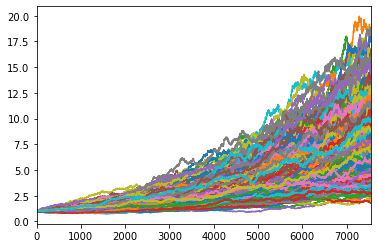

In [17]:
# Visualize the Simulation
portfolio_cumulative_returns.plot(legend=None)
plt.show()

In [18]:
# Select the last row for the cumulative returns (cumulative returns at 30 years)
ending_cumulative_returns_30 = portfolio_cumulative_returns.iloc[-1, :]
ending_cumulative_returns_30.head()

0    11.354038
1     5.129239
2    10.348583
3     9.541220
4     7.990371
Name: 7560, dtype: float64

In [19]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)
ending_cumulative_returns_20 = portfolio_cumulative_returns.iloc[-2521, :]
ending_cumulative_returns_20.head()

0    4.699043
1    2.740279
2    7.615175
3    4.202758
4    3.636661
Name: 5040, dtype: float64

In [20]:
# Display the 90% confidence interval for the ending returns
confidence_interval_30 = ending_cumulative_returns_30.quantile(q=[0.05, 0.95])
confidence_interval_20 = ending_cumulative_returns_20.quantile(q=[0.05, 0.95])

print(confidence_interval_30)
print(confidence_interval_20)

0.05     3.317742
0.95    13.238223
Name: 7560, dtype: float64
0.05    2.112529
0.95    6.351906
Name: 5040, dtype: float64


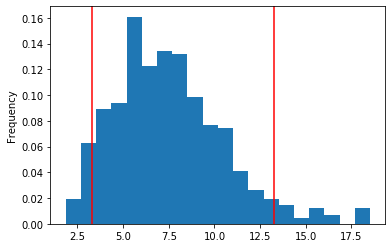

In [29]:
# Visualize the distribution of the ending returns
ending_cumulative_returns_30.plot(kind='hist', density=True, bins=20)
ending_cumulative_returns_30.value_counts(bins=10) / len(ending_cumulative_returns_30)
plt.axvline(confidence_interval_30.iloc[0], color='r')
plt.axvline(confidence_interval_30.iloc[1], color='r')


---

# Retirement Analysis

In this section, you will use the monte carlo model to answer the following retirement planning questions:

1. What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?
2. Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?
3. Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?
4. How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

### What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?

In [25]:
initial_investment = 20000
confidence_interval_10 = ending_cumulative_returns_30.quantile(q=[0.95, 0.05])
confidence_interval_50 = ending_cumulative_returns_30.quantile(q=[0.5, 0.5])

investment_pnl_lower_bound_90 = (initial_investment * confidence_interval_30.iloc[0])
investment_pnl_upper_bound_90 = (initial_investment * confidence_interval_30.iloc[1])
       
investment_pnl_lower_bound_50 = (initial_investment * confidence_interval_50.iloc[0])
investment_pnl_upper_bound_50 = (initial_investment * confidence_interval_50.iloc[1])

investment_pnl_lower_bound_10 = (initial_investment * confidence_interval_10.iloc[0])
investment_pnl_upper_bound_10 = (initial_investment * confidence_interval_10.iloc[1])

ending_cumulative_returns_30.value_counts(bins=10) / len(ending_cumulative_returns_30)

(5.188, 6.854]      0.236
(6.854, 8.52]       0.222
(3.522, 5.188]      0.152
(8.52, 10.186]      0.146
(10.186, 11.852]    0.096
(1.838, 3.522]      0.068
(11.852, 13.518]    0.038
(15.185, 16.851]    0.016
(13.518, 15.185]    0.016
(16.851, 18.517]    0.010
Name: 7560, dtype: float64

### Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?

In [26]:
print(f"There is a 90% chance that an initial investment of $20,000 in the portfolio"
      f" over the next 7560 trading days will end within in the range of"
      f" ${investment_pnl_lower_bound_90} and ${investment_pnl_upper_bound_90}")
print()
print()

print(f"There is a 50% chance that an initial investment of $20,000 in the portfolio"
      f" over the next 7560 trading days will end within in the range of"
      f" ${investment_pnl_lower_bound_50} and ${investment_pnl_upper_bound_50}")
print()
print()
print(f"There is a 10% chance that an initial investment of $20,000 in the portfolio"
      f" over the next 7560 trading days will end within in the range of"
      f" ${investment_pnl_lower_bound_10} and ${investment_pnl_upper_bound_10}")

There is a 90% chance that an initial investment of $20,000 in the portfolio over the next 7560 trading days will end within in the range of $66354.83353359034 and $264764.45699693996


There is a 50% chance that an initial investment of $20,000 in the portfolio over the next 7560 trading days will end within in the range of $142715.9358974036 and $142715.9358974036


There is a 10% chance that an initial investment of $20,000 in the portfolio over the next 7560 trading days will end within in the range of $264764.45699693996 and $66354.83353359034


### Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?

Note: This is effectively saying that 90% of the expected returns will be greater than the return at the 10th percentile, so this can help measure the uncertainty about having enough funds at retirement

In [33]:
withraw = 0.04 * (initial_investment * ending_cumulative_returns_30.sum())
withraw

exceeding value at the 10th percentile

3014872.2042329195

### How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

In [ ]:
also amount of retirement withdrawl will increased by 50% percent. 

### Optional Challenge

In this section, you will calculate and plot the cumulative returns for the median and 90% confidence intervals. This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 

In [ ]:
# YOUR CODE HERE